<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/%ED%98%9C%EC%A0%95/yolov5_use(%EC%A0%95%EB%A6%ACX).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 사전학습모델 만들기

In [22]:
# 코랩을 이용해서 사용하였습니다.
# 아래의 과정은 yolov5 튜토리얼과정중 일부입니다.
# 깃허브 링크: https://github.com/ultralytics/yolov5 , 튜토리얼 링크 : https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb

# 1) 먼저, yolo 설치가 필요합니다. ===============================================================
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla V100-SXM2-16GB)


In [23]:
# train_data.zip 파일을 저는 '/content'(%pwd) 에 넣었습니다.
# trani_data.zip 파일의 구성 : images 와 labels 폴더를 만들어 뒀습니다. 각 폴더 안에는 train 과 val 폴더가 있고, 사진과 라벨이 들어가있습니다.
# 2) train_data upzip 해줍니다===============================================================
# !unzip -q ../train_data.zip -d ../

In [33]:
# /content의 yolov5 폴더안의 data폴더에 custom_data.yaml 파일을 넣어줍니다.
# custom_data의 내용을 다음과 같습니다.
# ---------------------------------------------------------------------------------------------------
# train: /content/train_data/images/train  # train images (relative to 'path') 50 images
# val: /content/train_data/images/val  # val images (relative to 'path') 10 images
# test:  # test images (optional)

# # Classes
# nc: 7  # number of classes
# names: ['CARPAL', 'LMCP', 'MMCP', 'TMCP', 'LPIP', 'MPIP', 'IP']  # class names
# ----------------------------------------------------------------------------------------------------
# 3) *** batch, epochs 조절하고, custom_data.yaml 으로 수정해서 폴더에 넣어주고 실행합니다. ==============================================================
!python train.py --img 800 --batch 150 --epochs 100 --data custom_data.yaml --weights yolov5s.pt --cache

# 3번 과정의 실행이 완료되면 맨 마지막에 Results saved to runs/train/exp 라고 저장된 경로가 뜹니다.
# yolov5 폴더에 경로를 따라 들어가시면 확인하실 수 있습니다.


train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=150, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-39-g5d4258f torch 1.9.0+cu111 CUDA:0 (Tesla V100-SXM2-16GB, 16160.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1,

In [ ]:
# +) 박스 예측, test폴더를 만들어서 지정해주셔도 되고, 파일만 넣어도 detect 됩니다. 튜토리얼 과정을 참고하여 주세요. 여기서 저는 이것을 활용하지 않았습니다. 
# !python detect.py --weights runs/train/exp/weights/last.pt --img 320 --conf 0.25 --source ../717.jpg

## 2. 객체 인식 및 추출하기.

In [ ]:
# 4) 사전학습된 모델을 가져와서 예측(객체인식 및 추출)합니다. ==============================================================

#!pip install -qr requirements.txt 에 대한 런타임 재시작이 필요하다고 떠서 런타임을 재시작해 주었습니다.
# torch.hub.load 는 깃허브 리포지토리 또는 로컬 디렉터리에서 모델을 로드합니다. # 자세한 설명은 설명 사이트(https://pytorch.org/docs/stable/hub.html)를 참고해 주세요. # https://runebook.dev/ko/docs/pytorch/hub 이 사이트에서도 설명이 잘 되어있습니다.
# 리포지토리 또는 로컬 디렉터리 입력후 custom 이 들어간 자리는 모델명입니다. 
# model = torch.hub.load('repo_or_dir', 'model')  # yolov5에서 모델 종류는 yolov5s or yolov5m, yolov5l, yolov5x, custom 이렇게 있습니다.

import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/last.pt', force_reload=True) 


# custom 모델은 path에 파일(가중치파일) 경로를 적용하여 사전 훈련된 모델을 생성합니다. 
# 위(로컬)에서 train 과 val 데이터로 사전 훈련된 모델(즉, 모델 정의 및 사전 훈련 된 가중치)을 가져와서 사용하였습니다.

# 샘플 이미지를 모델에 넣어보고 예측값을 받아옵니다.
img = '/content/sample.jpg'  # 이미지 경로를 지정해줍니다.
results = model(img)  
# crops = results.crop(save=True)  - render() 전에 crop 사용하면 박스 쳐지기 전에 잘라서 저장됨!!!  < 저희가 모을 파일입니다ㅎ

# results.print() 모델에 적용된 결과값이 출력됩니다.
# image 1/1: 800x600 1 CARPAL, 1 LMCP, 1 MMCP, 1 TMCP, 1 LPIP, 1 MPIP, 1 IP
# 이미지 하나를 적용했고, 크기는 800*600 이며 인식된 객체의 라벨과 개수입니다.
# Speed: 12.7ms pre-process, 12.9ms inference, 1.4ms NMS per image at shape (1, 3, 640, 480) # 그 밖의 결과입니다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# results.imgs # array of original images (as np array) passed to model for inference
# results.render()  # updates results.imgs with boxes and labels
# render()을 이용하여 라벨이 붙은 이미지결과파일을 불러와서 np.squeeze로 길이가 1인 축을 제거합니다. - results의 image shape가 (1, 3, 640, 480) 인것을 위(results.print())에서 확인할 수 있었습니다.

plt.imshow(np.squeeze(results.render()))
crops = results.crop(save=False)
plt.show()

In [ ]:
# 박스쳐진부분 잘려서 저장됨. 경로설정 가능. 
# render()후라서 박스와 같이 저장됨.
crops = results.crop(save=False)

In [ ]:
# 박스쳐진 전체 이미지를 저장합니다.
save_img = np.squeeze(results.render())
import cv2
cv2.imwrite('/content/sample.jpg', save_img)

In [ ]:
# 결과를 pandas로 받아올 수 있습니다.
print(results.pandas().xyxy[0])
#          xmin        ymin       xmax      ymax  confidence  class    name
# 0  171.875000  450.312500  390.00000  630.9375    0.937988      0  CARPAL
# 1  230.625000  274.218750  287.50000  350.0000    0.911621      2    MMCP
# 2  421.250000  377.187500  481.25000  429.6875    0.902832      3    TMCP
# 3  220.468750  144.140625  269.53125  182.8125    0.895020      5    MPIP
# 4   67.500000  253.125000  108.43750  291.5625    0.890137      4    LPIP
# 5  124.765625  327.187500  185.62500  382.8125    0.873047      1    LMCP
# 6  487.187500  309.843750  532.81250  352.8125    0.850586      6      IP

## 샘플

In [ ]:
!pip install -qr requirements.txt

In [34]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/team2/last.pt', force_reload=True) 

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-11-1 torch 1.9.0+cu111 CUDA:0 (Tesla V100-SXM2-16GB, 16160.5MB)

Fusing layers... 
Model Summary: 213 layers, 7029004 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
# model1 = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best_0.pt', force_reload=True) 

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-10-31 torch 1.9.0+cu111 CUDA:0 (Tesla V100-SXM2-16GB, 16160.5MB)

Fusing layers... 
Model Summary: 213 layers, 7029004 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [35]:
# Images # 572번까지, 230제외
imgs = []
for i in range(1,230):
  try :
    img = f'/content/drive/MyDrive/team2/preprocessing_com/female/{i}_F.jpg'
    imgs.append(img)
  except:
    print(i)
    continue

print(len(imgs))

229


In [36]:
for i in range(231,573):
  try :
    img = f'/content/drive/MyDrive/team2/preprocessing_com/female/{i}_F.jpg'
    imgs.append(img)
  except:
    print(i)
    continue

print(len(imgs))

571


In [37]:
results1 = model(imgs)
results1.render()
crops1 = results1.crop(save=True)

Saved 571 images to runs/detect/exp2
Saved results to runs/detect/exp2



In [ ]:
import cv2
save_path = '/content/drive/MyDrive/team2/ppt/female/render/'
for i in range(0,572):
  plt_img = np.squeeze(results1.render())[i]
  cv2.imwrite(save_path+f'{i+1}_F.jpg', plt_img)
  # plt.imshow(plt_img)
  # plt.show()

In [ ]:
imgs = []
for i in range(1,666):
  try :
    img = f'/content/drive/MyDrive/team2/preprocessing_com/male/{i}_M.jpg'
    imgs.append(img)
  except:
    print(i)
    continue

print(len(imgs))

In [ ]:
results2 = model(imgs)
crops3 = results2.crop(save=True)

In [ ]:
import cv2
save_path = '/content/drive/MyDrive/team2/ppt/male/render/'
for i in range(0,665):
  plt_img = np.squeeze(results2.render())[i]
  cv2.imwrite(save_path+f'{i+1}_M.jpg', plt_img)
  # plt.imshow(plt_img)
  # plt.show()

In [ ]:
def save_img(name,mm):
  for i in range(1,573):
    try : 
      if i != 230 :
        img = f'/content/runs/detect/exp2/crops/{name}/{i}_F.jpg'
        img = cv2.imread(img)
        save_img = f'/content/drive/MyDrive/team2/ppt/{name}/{i}_F_{mm}.jpg'
        cv2.imwrite(save_img, img)
      except:
        print(name, i)
        continue

In [ ]:
save_img('CARPAL','cp')

In [ ]:
save_img('IP','ip')

In [ ]:
save_img('LMCP','lm')

In [ ]:
save_img('LPIP','lp')

In [ ]:
save_img('MMCP','mm')

In [ ]:
save_img('MPIP','mp')

In [ ]:
save_img('TMCP','tm')

In [ ]:
# import cv2
def save_img_male(name,mm):
  for i in range(1,666):
    try : 
      img = f'/content/runs/detect/exp3/crops/{name}/{i}_M.jpg'
      img = cv2.imread(img)
      save_img = f'/content/drive/MyDrive/team2/ppt/{name}/{i}_M_{mm}.jpg'
      cv2.imwrite(save_img, img)
    except:
      print(name, i)
      continue

In [ ]:
save_img_male('CARPAL','cp')

In [ ]:
save_img_male('IP','ip')

In [ ]:
save_img_male('LMCP','lm')

In [ ]:
save_img_male('LPIP','lp')

In [ ]:
save_img_male('MMCP','mm')

In [ ]:
save_img_male('MPIP','mp')

In [ ]:
save_img_male('TMCP','tm')

TypeError: ignored

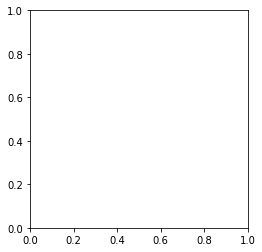

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.squeeze(results2.render()))
crops = results2.crop(save=False)
plt.show()

In [ ]:
imgs = []
for i in range(1,666):
  try :
    img = f'/content/drive/MyDrive/team2/preprocessing_com/male/{i}_M.jpg'
    imgs.append(img)
  except:
    print(i)
    continue

print(len(imgs))

665


In [ ]:
# results1 = model(imgs)
results2 = model1(imgs)

In [ ]:
crops2 = results2.crop(save=True)

Saved 665 images to runs/detect/exp4
Saved results to runs/detect/exp4



In [ ]:
plt.imshow(np.squeeze(results2.render()[0]))
crops = results2.crop(save=False)
plt.show()

In [ ]:
import cv2
for i in range(1,573):
  if i != 230 :
    img = f'/content/runs/detect/exp3/crops/CARPAL/{i}_F.jpg'
    img = cv2.imread(img)
    save_img = f'/content/drive/MyDrive/team2/ppt/CARPAL/{i}_F.jpg'
    cv2.imwrite(save_img, img)
  else : continue

In [ ]:
# import cv2
def save_img(name,mm):
  for i in range(1,573):
    if i != 230 :
      img = f'/content/runs/detect/exp3/crops/{name}/{i}_F.jpg'
      img = cv2.imread(img)
      save_img = f'/content/drive/MyDrive/team2/ppt/{name}/{i}_F_{mm}.jpg'
      cv2.imwrite(save_img, img)
    else : continue

In [ ]:
save_img('CARPAL','cp')

In [ ]:
save_img('IP','ip')

In [ ]:
save_img('LMCP','lm')

In [ ]:
save_img('LPIP','lp')

In [ ]:
save_img('MMCP','mm')

In [ ]:
save_img('MPIP','mp')

In [ ]:
save_img('TMCP','tm')

In [ ]:
imgs = []
for i in range(1,667):
  try :
    img = f'/content/drive/MyDrive/team2/preprocessing_com/male/{i}_M.jpg'
    imgs.append(img)
  except:
    print(i)
    continue

print(len(imgs))

666


In [ ]:
# import cv2
def save_img_male(name,mm):
  for i in range(1,666):
    try : 
      img = f'/content/runs/detect/exp4/crops/{name}/{i}_M.jpg'
      img = cv2.imread(img)
      save_img = f'/content/drive/MyDrive/team2/crop_img/male/{name}/{i}_M_{mm}.jpg'
      cv2.imwrite(save_img, img)
    except:
      print(name, i)
      continue

In [ ]:
save_img_male('CARPAL','cp')
save_img_male('IP','ip')
save_img_male('LMCP','lm')
save_img_male('LPIP','lp') #537, 647  < last.pt로는 해결됨. 
save_img_male('MMCP','mm')
save_img_male('MPIP','mp')
save_img_male('TMCP','tm')

In [ ]:
again_img = '/content/drive/MyDrive/team2/preprocessing_com/male/537_M.jpg'
results2 = model1(again_img)
crops2 = results2.crop(save=True)

Saved 1 image to runs/detect/exp5
Saved results to runs/detect/exp5



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.squeeze(results2.render()))
crops = results2.crop(save=False)
plt.show()

In [ ]:
again_img = '/content/drive/MyDrive/team2/preprocessing_com/male/537_M.jpg'
results1 = model(again_img)
crops1 = results1.crop(save=True)

Saved 1 image to runs/detect/exp6
Saved results to runs/detect/exp6

